In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from geopy import Point, distance
from math import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **Load File**

In [6]:
from google.colab import files
concrete = files.upload()

Saving concrete_data.csv to concrete_data.csv


In [8]:
df = pd.read_csv("concrete_data.csv")

In [10]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
df.shape

(1030, 9)

In [12]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [13]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

# **Visualization**

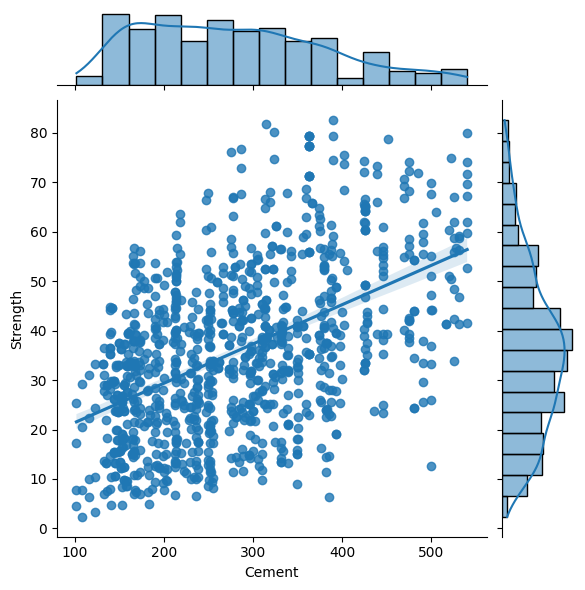

In [66]:
sns.jointplot(x='Cement',y='Strength',data=df,kind='reg')

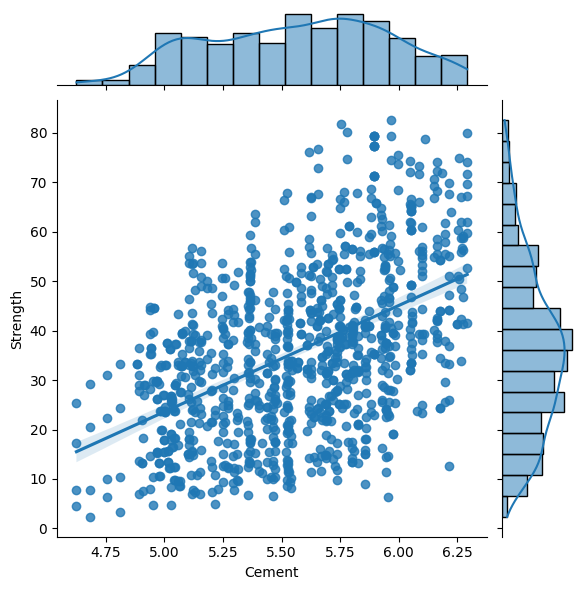

In [67]:
df['Cement']=np.log(df['Cement'])
sns.jointplot(x='Cement',y='Strength',data=df,kind='reg')

<Axes: >

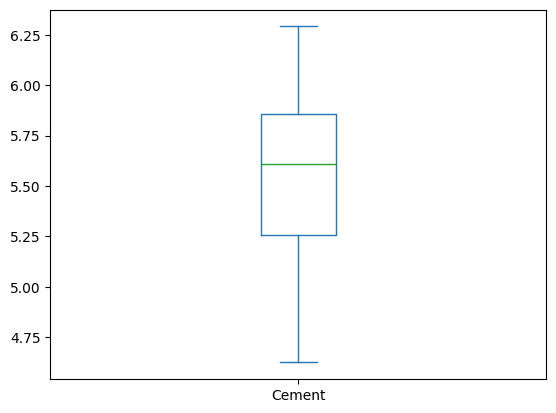

In [68]:
df.Cement.plot.box()

<Axes: >

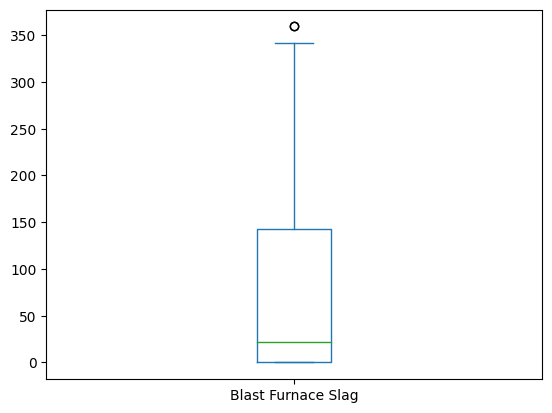

In [69]:
df['Blast Furnace Slag'].plot.box()

<Axes: >

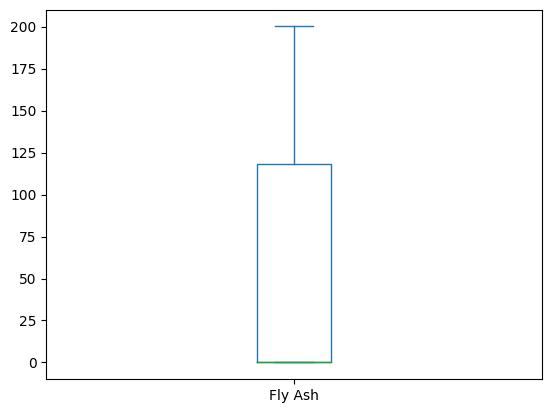

In [70]:
df['Fly Ash'].plot.box()

# **Train Test**

In [17]:
from sklearn.linear_model import *
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
X = df.drop(['Strength','Cement'], axis=1)

In [44]:
y = df['Strength']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [46]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

X_train.shape

(824, 7)

# *Linear Regression*

In [47]:
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)

rmae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)
rrmse= np.sqrt(mean_squared_error(y_test,y_pred))
rr2  = r2_score(y_test,y_pred)

print("mean absolute error:",rmae)
print("mean squared error:",rmse)
print("root mean squared error:",rmse)
print("r2-score:",rr2)

mean absolute error: 8.674174310665514
mean squared error: 113.83712221932534
root mean squared error: 113.83712221932534
r2-score: 0.5582175790319943


# **Ridge**

In [48]:
rid = Ridge()
rid.fit(X_train,y_train)
y_pred=rid.predict(X_test)

Rmae = mean_absolute_error(y_test,y_pred)
Rmse = mean_squared_error(y_test,y_pred)
Rrmse= np.sqrt(mean_squared_error(y_test,y_pred))
Rr2  = r2_score(y_test,y_pred)

print("mean absolute error:",Rmae)
print("mean squared error:",Rmse)
print("root mean squared error:",Rrmse)
print("r2-score:",Rr2)

mean absolute error: 8.678681319089685
mean squared error: 113.9169210947187
root mean squared error: 10.673187016759274
r2-score: 0.5579078932311368


# **Lasso**

In [49]:
las = Lasso()
las.fit(X_train,y_train)
y_pred=las.predict(X_test)

lmae = mean_absolute_error(y_test,y_pred)
lmse = mean_squared_error(y_test,y_pred)
lrmse= np.sqrt(mean_squared_error(y_test,y_pred))
lr2  = r2_score(y_test,y_pred)

print("mean absolute error:",lmae)
print("mean squared error:",lmse)
print("root mean squared error:",lrmse)
print("r2-score:",lr2)

mean absolute error: 9.146241308672046
mean squared error: 125.89460760350353
root mean squared error: 11.22027662776206
r2-score: 0.5114245384143152


# **Summary**

In [50]:
data = [['Linear',rmae,rmse,rrmse,rr2], ['Lasso',Rmae,Rmse,Rrmse,Rr2], ['Ridge',lmae,lmse,lrmse,lr2]]
summary = pd.DataFrame(data, columns=['Model', 'Mean Absolute Error','Mean Squred Error','Root Mean Squared Error','R2 Score'])

summary

,Model,Mean Absolute Error,Mean Squred Error,Root Mean Squared Error,R2 Score
0,Linear,8.674174,113.837122,10.669448,0.558218
1,Lasso,8.678681,113.916921,10.673187,0.557908
2,Ridge,9.146241,125.894608,11.220277,0.511425


# **Neural Network**

In [58]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from geopy.format import units
from sklearn.metrics import mean_squared_error

In [64]:
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(units = 128, kernel_initializer='normal', activation='relu'),
    Dense(units = 64, kernel_initializer='normal', activation='relu'),
    Dense(units = 32, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal')
  ])
  return model
# build the model
model = build_model_using_sequential()

# **Loss**

In [73]:
#loss function

learning_rate = 0.01

msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=50,
    validation_split=0.2
)

Epoch 1/10
14/14 [==============================] - 2s 21ms/step - loss: 0.0682 - mean_squared_logarithmic_error: 0.0689 - val_loss: 0.0724 - val_mean_squared_logarithmic_error: 0.0750
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0681 - mean_squared_logarithmic_error: 0.0674 - val_loss: 0.0651 - val_mean_squared_logarithmic_error: 0.0649
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0671 - mean_squared_logarithmic_error: 0.0669 - val_loss: 0.0586 - val_mean_squared_logarithmic_error: 0.0587
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 0.0617 - mean_squared_logarithmic_error: 0.0639 - val_loss: 0.0645 - val_mean_squared_logarithmic_error: 0.0681
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.0612 - mean_squared_logarithmic_error: 0.0590 - val_loss: 0.0698 - val_mean_squared_logarithmic_error: 0.0702
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0635 